In [ ]:
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import networkx as nx
import ast
import plotly.graph_objects as go

In [ ]:
#read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins = list(reader_ins)

In [ ]:
#read in TikTok data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt = list(reader_tt)

In [ ]:
# Read in the first YouTube data file
file_path_en = r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en.csv'
with open(file_path_en, 'r', encoding='utf-8') as f_en:
    reader_en = csv.reader(f_en, delimiter=',')
    rows_en = list(reader_en)

# Read in the second YouTube data file
file_path_nl = r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl.csv'
with open(file_path_nl, 'r', encoding='utf-8') as f_nl:
    reader_nl = csv.reader(f_nl, delimiter=',')
    rows_nl = list(reader_nl)

# Combine the rows from both files
rows_yt = rows_en + rows_nl

In [ ]:
# Making the TikTok dataframe
dfins = pd.DataFrame(rows_ins)
# Making the first row the header
new_header = dfins.iloc[0] 
dfins = dfins[1:]
dfins.columns = new_header 
#dfins

In [ ]:
# Making the TikTok dataframe
dftt = pd.DataFrame(rows_tt)
# Making the first row the header
new_header = dftt.iloc[0] 
dftt = dftt[1:]
dftt.columns = new_header 
#dftt

In [64]:
# Making the YouTube dataframe
dfyt = pd.DataFrame(rows_yt)
# Making the first row the header
new_header = dfyt.iloc[0] 
dfyt = dfyt[1:]
dfyt.columns = new_header 
#dfyt

In [ ]:
# Listing all the username for the Instagram Dataset
dfins['username'] = dfins['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
insinf = set(dfins['username'].unique())

dftt['username'] = dftt['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ttinf = set(dftt['username'].unique())

dfyt['channel_title'] = dfyt['channel_title'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ytinf = set(dfyt['channel_title'].unique())

In [ ]:
# Find common elements between lists
common_in_1_and_2 = insinf.intersection(ttinf)
common_in_1_and_3 = insinf.intersection(ytinf)
common_in_2_and_3 = ttinf.intersection(ytinf)

# Merge all common elements
all_common_elements = common_in_1_and_2.union(common_in_1_and_3, common_in_2_and_3)

# Create a dictionary to store the count of lists in which each name is present
name_presence_count = {}

# Check for each common element in the lists and update the count
for name in all_common_elements:
    count = 0
    if name in insinf:
        count += 1
    if name in ttinf:
        count += 1
    if name in ytinf:
        count += 1
    name_presence_count[name] = count
    
# Create a Dataframe for the names and counts
dfrep = pd.DataFrame(list(name_presence_count.items()), columns=['Name', 'Count'])

# Plot using a Venn Diagram
venn3([insinf, ttinf, ytinf], ('Instagram', 'TikTok', 'YouTube'))
plt.show()

In [ ]:
# Convert to datetime format
dfins['date'] = pd.to_datetime(dfins['date'])

# Group by the day and count instances for each week
count_by_week = dfins.resample('W-Mon', on='date').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['date'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Convert to datetime format
dftt['create_time'] = pd.to_datetime(dftt['create_time'])

# Group by the day and count instances for each week
count_by_week = dftt.resample('W-Mon', on='create_time').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['create_time'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Convert to datetime format
dfyt['published_at_video'] = pd.to_datetime(dfyt['published_at_video'], errors='coerce')

# Group by the day and count instances for each week
count_by_week = dfyt.resample('W-Mon', on='published_at_video').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['published_at_video'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Convert to datetime format for each DataFrame
dfins['date'] = pd.to_datetime(dfins['date'])
dftt['create_time'] = pd.to_datetime(dftt['create_time'])
dfyt['published_at_video'] = pd.to_datetime(dfyt['published_at_video'])

# Group by the week and count instances for each week for each DataFrame
count_by_week1 = dfins.resample('W-Mon', on='date').size().reset_index(name='count1')
count_by_week2 = dftt.resample('W-Mon', on='create_time').size().reset_index(name='count2')
count_by_week3 = dfyt.resample('W-Mon', on='published_at_video').size().reset_index(name='count3')

# Plot each DataFrame separately
plt.plot(count_by_week1['date'], count_by_week1['count1'], label='Instagram', linestyle='-', linewidth=1)
plt.plot(count_by_week2['create_time'], count_by_week2['count2'], label='TikTok', linestyle='-', linewidth=1)
plt.plot(count_by_week3['published_at_video'], count_by_week3['count3'], label='YouTube', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances per Week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
insall = dfins[dfins['username'].isin(all_common_elements)]
ins12 = dfins[dfins['username'].isin(common_in_1_and_2)]
ins13 = dfins[dfins['username'].isin(common_in_1_and_3)]

ttall = dftt[dftt['username'].isin(all_common_elements)]
tt21 = dftt[dftt['username'].isin(common_in_1_and_2)]
tt23 = dftt[dftt['username'].isin(common_in_2_and_3)]

ytall = dfyt[dfyt['channel_title'].isin(all_common_elements)]
yt31 = dfyt[dfyt['channel_title'].isin(common_in_1_and_3)]
yt32 = dfyt[dfyt['channel_title'].isin(common_in_2_and_3)]

In [ ]:
# Calculate the proportions of each language
insall = insall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = insall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
dfins = dfins.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dfins['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
ins12 = ins12.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ins12['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
ins13 = ins13.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ins13['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
ttall = ttall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ttall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
dftt = dftt.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dftt['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
tt23 = tt23.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = tt23['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color=('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
tt21 = tt21.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = tt21['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
dfyt = dfyt.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dfyt['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
ytall = ytall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ytall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
yt31 = yt31.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = yt31['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
yt32 = yt32.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = yt32['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the time between posts for influencers
timediffins = pd.DataFrame({
    "Username": list(insinf),
    'Time Difference': [dfins[dfins['username'] == username]['date'].sort_values().diff().mean() for username in insinf]
})

timedifftt = pd.DataFrame({
    "Username": list(ttinf),
    'Time Difference': [dftt[dftt['username'] == username]['create_time'].sort_values().diff().mean() for username in ttinf]
})

timediffyt = pd.DataFrame({
    "Username": list(ytinf),
    'Time Difference': [dfyt[dfyt['channel_title'] == username]['published_at_video'].sort_values().diff().mean() for username in ytinf]
})

In [ ]:

# Combine the data into a list of arrays
data_to_plot = [
    timediffyt["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timedifftt["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffins["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24)
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['YouTube', 'TikTok', 'Instagram'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 200)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
timediffinsEN = pd.DataFrame({
    "Username": list(insinf),
    'Time Difference': [
        dfins[(dfins['username'] == username) & (dfins['language_detect'] == 'Language.ENGLISH')]['date']
        .sort_values()
        .diff()
        .mean()
        for username in insinf
    ]
})
timediffinsDU = pd.DataFrame({
    "Username": list(insinf),
    'Time Difference': [
        dfins[(dfins['username'] == username) & (dfins['language_detect'] == 'Language.DUTCH')]['date']
        .sort_values()
        .diff()
        .mean()
        for username in insinf
    ]
})


timediffttEN = pd.DataFrame({
    "Username": list(ttinf),
    'Time Difference': [
        dftt[(dfins['username'] == username) & (dftt['language_detect'] == 'Language.ENGLISH')]['create_time']
        .sort_values()
        .diff()
        .mean()
        for username in ttinf
    ]
})
timediffttDU = pd.DataFrame({
    "Username": list(ttinf),
    'Time Difference': [
        dftt[(dftt['username'] == username) & (dftt['language_detect'] == 'Language.DUTCH')]['create_time']
        .sort_values()
        .diff()
        .mean()
        for username in ttinf
    ]
})


timediffytEN = pd.DataFrame({
    "Username": list(ytinf),
    'Time Difference': [
        dfyt[(dfyt['channel_title'] == username) & (dfyt['language_detect'] == 'Language.ENGLISH')]['published_at_video']
        .sort_values()
        .diff()
        .mean()
        for username in ytinf
    ]
})
timediffytDU = pd.DataFrame({
    "Username": list(ytinf),
    'Time Difference': [
        dfyt[(dfyt['channel_title'] == username) & (dfyt['language_detect'] == 'Language.DUTCH')]['published_at_video']
        .sort_values()
        .diff()
        .mean()
        for username in ytinf
    ]
})

In [ ]:

# Combine the data into a list of arrays
data_to_plot = [
    timediffinsEN["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffinsDU["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['English', 'Dutch'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 200)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Combine the data into a list of arrays
data_to_plot = [
    timediffttEN["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffttDU["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['English', 'Dutch'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 200)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [70]:
dfins_en = dfins[dfins['language_detect'] == 'Language.ENGLISH']
dfins_nl = dfins[dfins['language_detect'] == 'Language.DUTCH']
dfyt_nl = dfyt[dfyt['language_detect'] == 'Language.DUTCH']
dfyt_en = dfyt[dfyt['language_detect'] == 'Language.ENGLISH']
dftt_en = dftt[dftt['language_detect'] == 'Language.ENGLISH']
dftt_nl = dftt[dftt['language_detect'] == 'Language.DUTCH']

### Network for English Instagram

In [76]:
dfins_en["caption_hashtags"] = dfins_en["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_en = dfins_en[dfins_en["caption_hashtags"].apply(lambda x: bool(x))].reset_index(drop=True)

C:\Users\I6240624\AppData\Local\Temp\ipykernel_1932\1369689326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfins_en["caption_hashtags"] = dfins_en["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")


In [77]:
sample_size = 1000
random_sample = dfinshas_en.sample(n=sample_size, random_state=42)

In [78]:
G_en = nx.Graph()
for words_list in random_sample['caption_hashtags']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

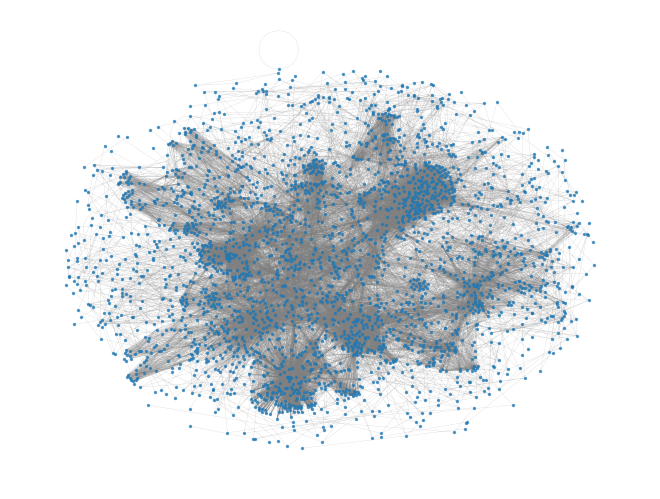

In [79]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for Dutch Instagram

In [80]:
dfins_nl["caption_hashtags"] = dfins_nl["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_nl = dfins_nl[dfins_nl["caption_hashtags"].apply(lambda x: bool(x))].reset_index(drop=True)

C:\Users\I6240624\AppData\Local\Temp\ipykernel_1932\917034545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfins_nl["caption_hashtags"] = dfins_nl["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")


In [81]:
sample_size = 1000
random_sample = dfinshas_nl.sample(n=sample_size, random_state=42)

In [82]:
G_nl = nx.Graph()
for words_list in random_sample['caption_hashtags']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

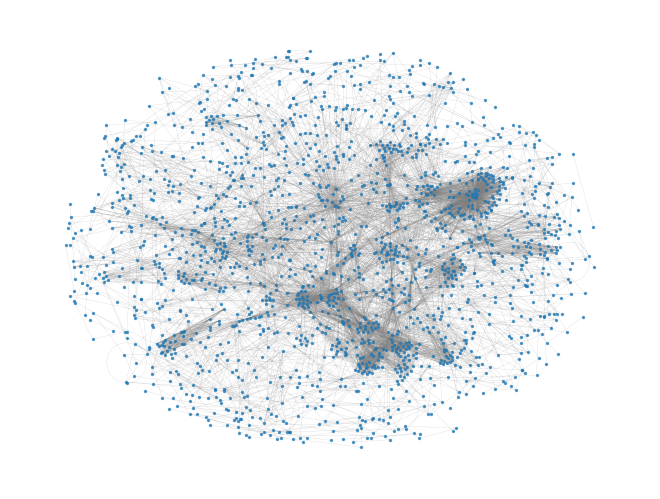

In [83]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for English TikTok

In [84]:
dftt_en["hashtag_names"] = dftt_en["hashtag_names"].apply(lambda x: ast.literal_eval(x) if x else "")
dftthas_en = dftt_en[dftt_en["hashtag_names"].apply(lambda x: bool(x))].reset_index(drop=True)

TypeError: boolean value of NA is ambiguous

In [ ]:
sample_size = 1000
random_sample = dftthas_en.sample(n=sample_size, random_state=42)

In [ ]:
G_en = nx.Graph()
for words_list in random_sample['hashtag_names']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

In [ ]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for Dutch TikTok

In [ ]:
dftt_nl["hashtag_names"] = dftt_nl["hashtag_names"].apply(lambda x: ast.literal_eval(x) if x else "")
dftthas_nl = dftt_nl[dftt_nl["hashtag_names"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
sample_size = 1000
random_sample = dftthas_nl.sample(n=sample_size, random_state=42)

In [ ]:
G_nl = nx.Graph()
for words_list in random_sample['hashtag_names']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

In [ ]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for English YouTube

In [ ]:
# Convert string representations of tags into lists
dfyt_en["tags"] = dfyt_en["tags"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfythas_en = dfyt_en[dfyt_en["tags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
sample_size = 1000
random_sample = dfythas_en.sample(n=sample_size, random_state=42)

In [ ]:
G_en = nx.Graph()
for words_list in random_sample['tags']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

In [ ]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for Dutch YouTube

In [ ]:
# Convert string representations of tags into lists
dfyt_nl["tags"] = dfyt_nl["tags"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfythas_nl = dfyt_nl[dfyt_nl["tags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
sample_size = 1000
random_sample = dfythas_nl.sample(n=sample_size, random_state=42)

In [ ]:
G_nl = nx.Graph()
for words_list in random_sample['tags']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

In [ ]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)